In [ ]:
folder_save = "/home/ubuntu/workspace/dataset/DANC/Result/Model_MTL_MP"

In [19]:
import numpy as np
import torch

npref = 5
def circle_points(r, n):
    """
    generate evenly distributed unit preference vectors for two tasks
    """
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 0.5 * np.pi, n)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles
ref_vec = torch.tensor(circle_points([1], [npref])[0]).cuda().float()
ref_vec

tensor([[1.0000e+00, 0.0000e+00],
        [9.2388e-01, 3.8268e-01],
        [7.0711e-01, 7.0711e-01],
        [3.8268e-01, 9.2388e-01],
        [6.1232e-17, 1.0000e+00]], device='cuda:0')

In [23]:
ref_vecs = []
for element in ref_vec:
    if element[0] != 1 and element[1] != 1:
        ref_vecs.append(element)

ref_vecs = torch.stack(ref_vecs)
len(ref_vecs)
# ref_vec

3

In [ ]:
import pickle
dir = '/home/ubuntu/workspace/dataset/DANC/Result/Model_PMTL/mnist_lenet_niter_100_npref_5_prefidx_0.pickle'

with open(dir,'rb') as f:
    data = pickle.load(f)
    
print(data)

In [1]:
import numpy 

In [3]:
import pickle
# dir = '/home/ubuntu/workspace/dataset/DANC/Result/Model_PMTL/mnist_lenet_niter_100_npref_5_prefidx_0.pickle'
dir1 = '/home/ubuntu/workspace/dataset/DANC/Result/MTL_MOP/optimizer=Adam|batch_size=256|lr=0.0005|dataset=mnist|normalization_type=loss+|algorithm=mgda|use_approximation=True|parallel=True_97_model.pkl'
with open(dir1,'rb') as f:
    data = pickle.load(f)
    
print(data)

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [7]:
import pickle
# dir = '/home/ubuntu/workspace/dataset/DANC/Result/Model_PMTL/mnist_lenet_niter_100_npref_5_prefidx_0.pickle'
# dir1 = '/home/ubuntu/workspace/dataset/DANC/Result/MTL_MOP/optimizer=Adam|batch_size=256|lr=0.0005|dataset=mnist|normalization_type=loss+|algorithm=mgda|use_approximation=True|parallel=True_97_model.pkl'
dir1 = './file.pickle'
with open(dir1,'rb') as f:
    f.seek(0)
    data = pickle.load(f)
    
print(data)

UnpicklingError: could not find MARK

In [ ]:
# while (max(task_loss_after[0]/ref[0], task_loss_after[1]/ref[1]) > max(task_loss[0]/ref[0], task_loss[1]/ref[1]) - eps * kappa * norm_acc):
            #     kappa /= 2 
            #     for p in model.parameters():
            #         if p.requires_grad is False:
            #             continue
            #         dp = p.grad
            #         if dp is not None:
            #             dp = dp * (1 - (1/2))
            #             p.data -= 1e-3 * dp
                        
            #     task_loss_after = model(X, ts)
                
            #     if kappa < 1e-50:
            #         print('kappa to 0', kappa)
            #         time.sleep(10)
            #         break

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the text file (for this example, I'm assuming the data is provided as a string)
data = """
1/100: weights=[0.09507056 1.9049294 ], train_loss=[2.3561783 1.3512878], train_acc=[0.21195833 0.53211667], test_loss=[2.3380291 1.3478479], test_acc=[0.216   0.53105]
2/100: weights=[0.04313963 1.9568604 ], train_loss=[2.1322558 1.1059111], train_acc=[0.28631667 0.62356667], test_loss=[2.1201642 1.0961117], test_acc=[0.288  0.6275]
4/100: weights=[0.04560259 1.9543974 ], train_loss=[1.7934682 0.8727753], train_acc=[0.4023     0.70635833], test_loss=[1.7873656 0.8600832], test_acc=[0.4022  0.70855]
6/100: weights=[0.002 1.998], train_loss=[1.4740316 0.7763711], train_acc=[0.50733333 0.74058333], test_loss=[1.4634191  0.76590914], test_acc=[0.5044 0.7412]
8/100: weights=[0.08634167 1.9136584 ], train_loss=[1.2530404 0.70406  ], train_acc=[0.58296667 0.76371667], test_loss=[1.2394396 0.6937038], test_acc=[0.58475 0.7662 ]
10/100: weights=[0.00970061 1.9902993 ], train_loss=[1.0908457  0.65773857], train_acc=[0.63708333 0.77883333], test_loss=[1.0773479  0.64845973], test_acc=[0.64005 0.78055]
12/100: weights=[0.05829345 1.9417065 ], train_loss=[0.9800195 0.6264763], train_acc=[0.6746  0.78795], test_loss=[0.96739525 0.6164228 ], test_acc=[0.6788 0.7895]
14/100: weights=[0.15624344 1.8437566 ], train_loss=[0.896716   0.59555346], train_acc=[0.703175   0.79866667], test_loss=[0.88188136 0.59012294], test_acc=[0.70785 0.79885]
16/100: weights=[0.002 1.998], train_loss=[0.8373369  0.58366185], train_acc=[0.72425833 0.80150833], test_loss=[0.82326406 0.5785714 ], test_acc=[0.7266 0.8023]
18/100: weights=[0.16725901 1.832741  ], train_loss=[0.7908666  0.55287665], train_acc=[0.74030833 0.81368333], test_loss=[0.7797487  0.55285215], test_acc=[0.7424  0.81185]
20/100: weights=[0.12666322 1.8733368 ], train_loss=[0.7495914 0.5312354], train_acc=[0.75359167 0.8209    ], test_loss=[0.7397801 0.5313812], test_acc=[0.7572  0.81975]
22/100: weights=[0.0658996 1.9341004], train_loss=[0.7176009  0.52160203], train_acc=[0.765      0.82518333], test_loss=[0.7077655  0.52652663], test_acc=[0.76675 0.8244 ]
24/100: weights=[0.08409522 1.9159048 ], train_loss=[0.6887441  0.50292724], train_acc=[0.77426667 0.83086667], test_loss=[0.67831594 0.5059562 ], test_acc=[0.7792  0.82845]
26/100: weights=[0.18873052 1.8112695 ], train_loss=[0.6652535  0.49069774], train_acc=[0.782175   0.83475833], test_loss=[0.6563636  0.49623767], test_acc=[0.7867  0.83395]
28/100: weights=[0.1285504 1.8714496], train_loss=[0.64560246 0.48491755], train_acc=[0.78824167 0.83728333], test_loss=[0.63579    0.48763093], test_acc=[0.79295 0.8371 ]
30/100: weights=[0.10658769 1.8934124 ], train_loss=[0.62742424 0.47621328], train_acc=[0.79563333 0.83984167], test_loss=[0.6199954 0.4855734], test_acc=[0.7992  0.83665]
32/100: weights=[0.2071738 1.7928262], train_loss=[0.61678934 0.4746379 ], train_acc=[0.799225 0.8408  ], test_loss=[0.6082486  0.48479405], test_acc=[0.8006  0.83855]
34/100: weights=[0.13716377 1.8628362 ], train_loss=[0.5964977  0.45474342], train_acc=[0.80654167 0.84673333], test_loss=[0.5860954  0.46263683], test_acc=[0.8095  0.84485]
36/100: weights=[0.06078596 1.939214  ], train_loss=[0.58149433 0.44982067], train_acc=[0.81135833 0.84865   ], test_loss=[0.5712296  0.46114978], test_acc=[0.81595 0.845  ]
38/100: weights=[0.163953 1.836047], train_loss=[0.5719094  0.44082087], train_acc=[0.81449167 0.85235833], test_loss=[0.5617341  0.45461178], test_acc=[0.81825 0.84825]
40/100: weights=[0.10689828 1.8931017 ], train_loss=[0.56164396 0.43648663], train_acc=[0.81749167 0.853975  ], test_loss=[0.5512751  0.45107752], test_acc=[0.82105 0.8509 ]
42/100: weights=[0.2336695 1.7663305], train_loss=[0.5493761  0.43230838], train_acc=[0.82239167 0.85448333], test_loss=[0.5388376  0.44229823], test_acc=[0.82645 0.85   ]
44/100: weights=[0.06070394 1.939296  ], train_loss=[0.5424073  0.42765647], train_acc=[0.82453333 0.85513333], test_loss=[0.5328595  0.43839976], test_acc=[0.8262  0.85215]
46/100: weights=[0.20308247 1.7969176 ], train_loss=[0.5309352  0.41663337], train_acc=[0.82829167 0.860725  ], test_loss=[0.52070737 0.43071786], test_acc=[0.8303 0.8582]
48/100: weights=[0.09854735 1.9014527 ], train_loss=[0.5263079  0.43117005], train_acc=[0.83010833 0.854     ], test_loss=[0.51757723 0.44898438], test_acc=[0.8314 0.8495]
50/100: weights=[0.04409653 1.9559035 ], train_loss=[0.5203635 0.4223498], train_acc=[0.8314     0.85874167], test_loss=[0.5098953 0.4427304], test_acc=[0.83435 0.85225]
52/100: weights=[0.19466217 1.8053378 ], train_loss=[0.5180237 0.4138882], train_acc=[0.83266667 0.861125  ], test_loss=[0.5086369  0.43214828], test_acc=[0.8354  0.85655]
54/100: weights=[0.23232111 1.7676789 ], train_loss=[0.5052596  0.40364602], train_acc=[0.83661667 0.86393333], test_loss=[0.4957543  0.42072964], test_acc=[0.83955 0.86015]
56/100: weights=[0.08946878 1.9105313 ], train_loss=[0.49877253 0.39248893], train_acc=[0.838275   0.86879167], test_loss=[0.4891795  0.41343984], test_acc=[0.84125 0.86035]
58/100: weights=[0.09545343 1.9045466 ], train_loss=[0.49408138 0.39647046], train_acc=[0.84013333 0.867075  ], test_loss=[0.4845299 0.4163717], test_acc=[0.84305 0.8603 ]
60/100: weights=[0.16439223 1.8356078 ], train_loss=[0.4923029  0.38235506], train_acc=[0.841275   0.87219167], test_loss=[0.48067534 0.4016593 ], test_acc=[0.84435 0.8666 ]
62/100: weights=[0.13126339 1.8687366 ], train_loss=[0.47952327 0.38993567], train_acc=[0.84500833 0.86890833], test_loss=[0.4704076  0.41452748], test_acc=[0.8479 0.8598]
64/100: weights=[0.0578331 1.9421669], train_loss=[0.47873837 0.3805448 ], train_acc=[0.845      0.87306667], test_loss=[0.47186533 0.40321103], test_acc=[0.84635 0.86525]
66/100: weights=[0.03786581 1.9621342 ], train_loss=[0.4728036  0.38818184], train_acc=[0.84725833 0.87044167], test_loss=[0.46227315 0.4127816 ], test_acc=[0.84945 0.8621 ]
68/100: weights=[0.11676935 1.8832307 ], train_loss=[0.46774703 0.371166  ], train_acc=[0.8491     0.87521667], test_loss=[0.45875955 0.39278248], test_acc=[0.8511  0.86735]
70/100: weights=[0.10998455 1.8900155 ], train_loss=[0.46467718 0.37938258], train_acc=[0.84934167 0.87284167], test_loss=[0.45627788 0.40386996], test_acc=[0.85125 0.8626 ]
72/100: weights=[0.04207689 1.957923  ], train_loss=[0.4588237  0.37513438], train_acc=[0.85180833 0.8744    ], test_loss=[0.451526 0.402451], test_acc=[0.85355 0.8652 ]
74/100: weights=[0.05935358 1.9406464 ], train_loss=[0.45627704 0.37309918], train_acc=[0.85241667 0.87489167], test_loss=[0.44994175 0.39807898], test_acc=[0.8531 0.868 ]
76/100: weights=[0.11585232 1.8841476 ], train_loss=[0.45078987 0.3600106 ], train_acc=[0.85388333 0.87945833], test_loss=[0.44087863 0.38781986], test_acc=[0.85555 0.8711 ]
78/100: weights=[0.04855951 1.9514405 ], train_loss=[0.44468856 0.35480803], train_acc=[0.85583333 0.881225  ], test_loss=[0.4368828  0.38292825], test_acc=[0.85705 0.87295]
80/100: weights=[0.08526816 1.9147319 ], train_loss=[0.44333428 0.35912898], train_acc=[0.85666667 0.87925833], test_loss=[0.4352941  0.38330564], test_acc=[0.85705 0.87155]
82/100: weights=[0.002 1.998], train_loss=[0.44041482 0.36272928], train_acc=[0.8573   0.878175], test_loss=[0.43444946 0.3944885 ], test_acc=[0.85835 0.8676 ]
84/100: weights=[0.22634153 1.7736585 ], train_loss=[0.43870306 0.34777507], train_acc=[0.85721667 0.883     ], test_loss=[0.43219265 0.3768189 ], test_acc=[0.85825 0.8738 ]
86/100: weights=[0.08964507 1.910355  ], train_loss=[0.43591502 0.36268422], train_acc=[0.85871667 0.87811667], test_loss=[0.43108988 0.3912065 ], test_acc=[0.85925 0.87175]
88/100: weights=[0.17750265 1.8224974 ], train_loss=[0.4307236  0.34257016], train_acc=[0.86014167 0.88519167], test_loss=[0.4245552 0.3742328], test_acc=[0.86165 0.87595]
90/100: weights=[0.10437184 1.8956282 ], train_loss=[0.4250556 0.339818 ], train_acc=[0.86203333 0.8864    ], test_loss=[0.4199508 0.3731849], test_acc=[0.8644  0.87525]
92/100: weights=[0.18164702 1.8183529 ], train_loss=[0.42397916 0.3394497 ], train_acc=[0.862175   0.88601667], test_loss=[0.41916656 0.37344497], test_acc=[0.8634 0.8762]
94/100: weights=[0.07942934 1.9205706 ], train_loss=[0.42166752 0.3429935 ], train_acc=[0.86315  0.883925], test_loss=[0.4156859 0.3779068], test_acc=[0.8651  0.87315]
96/100: weights=[0.2359559 1.7640442], train_loss=[0.4171755  0.33664495], train_acc=[0.86438333 0.88688333], test_loss=[0.412361   0.36993885], test_acc=[0.86555 0.87525]
98/100: weights=[0.2346728 1.7653272], train_loss=[0.41517672 0.33775046], train_acc=[0.86514167 0.88754167], test_loss=[0.40950632 0.37231976], test_acc=[0.86595 0.8783 ]
100/100: weights=[0.1247384 1.8752615], train_loss=[0.41224027 0.33171177], train_acc=[0.86618333 0.88839167], test_loss=[0.40851933 0.36729977], test_acc=[0.8659 0.8773]
"""

# Extract relevant data using regular expressions
iterations = []
weights = []
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for match in re.finditer(r'(\d+)/100: weights=\[(.+?)\], train_loss=\[(.+?)\], train_acc=\[(.+?)\], test_loss=\[(.+?)\], test_acc=\[(.+?)\]', data):
    iterations.append(int(match.group(1)))
    weights.append([float(x) for x in match.group(2).split()])
    train_losses.append([float(x) for x in match.group(3).split()])
    train_accs.append([float(x) for x in match.group(4).split()])
    test_losses.append([float(x) for x in match.group(5).split()])
    test_accs.append([float(x) for x in match.group(6).split()])

# Convert to numpy arrays
iterations = np.array(iterations)
weights = np.array(weights)
train_losses = np.array(train_losses)
train_accs = np.array(train_accs)
test_losses = np.array(test_losses)
test_accs = np.array(test_accs)

iterations, weights, train_losses, train_accs, test_losses, test_accs


(array([  1,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 array([[0.09507056, 1.9049294 ],
        [0.04313963, 1.9568604 ],
        [0.04560259, 1.9543974 ],
        [0.002     , 1.998     ],
        [0.08634167, 1.9136584 ],
        [0.00970061, 1.9902993 ],
        [0.05829345, 1.9417065 ],
        [0.15624344, 1.8437566 ],
        [0.002     , 1.998     ],
        [0.16725901, 1.832741  ],
        [0.12666322, 1.8733368 ],
        [0.0658996 , 1.9341004 ],
        [0.08409522, 1.9159048 ],
        [0.18873052, 1.8112695 ],
        [0.1285504 , 1.8714496 ],
        [0.10658769, 1.8934124 ],
        [0.2071738 , 1.7928262 ],
        [0.13716377, 1.8628362 ],
        [0.06078596, 1.939214  ],
        [0.163953  , 1.836047  ],
        [0.10689828, 1.8931017 

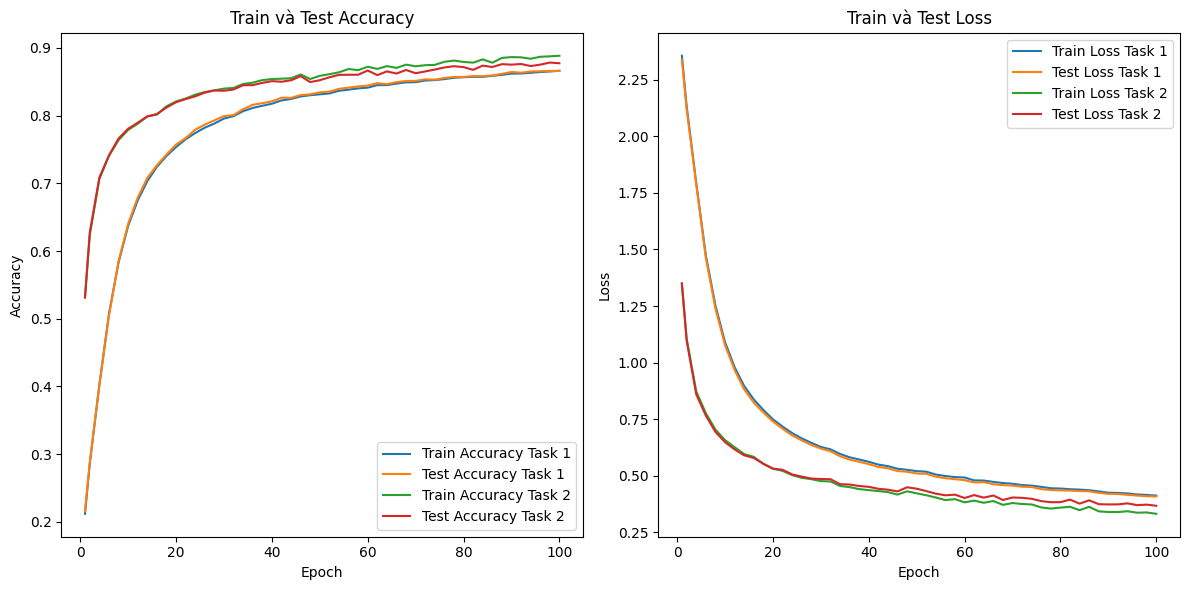

In [4]:
# Plotting Train and Test Accuracy for both tasks
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(iterations, train_accs[:, 0], label='Train Accuracy Task 1')
plt.plot(iterations, test_accs[:, 0], label='Test Accuracy Task 1')
plt.plot(iterations, train_accs[:, 1], label='Train Accuracy Task 2')
plt.plot(iterations, test_accs[:, 1], label='Test Accuracy Task 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train và Test Accuracy')
plt.legend()

# Plotting Train and Test Loss for both tasks
plt.subplot(1, 2, 2)
plt.plot(iterations, train_losses[:, 0], label='Train Loss Task 1')
plt.plot(iterations, test_losses[:, 0], label='Test Loss Task 1')
plt.plot(iterations, train_losses[:, 1], label='Train Loss Task 2')
plt.plot(iterations, test_losses[:, 1], label='Test Loss Task 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train và Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
"""
tmux 
0 - constant step-size, reference-based
2 - line-search step-size, preference-based
4 - line-search step-size, reference-based
"""


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the text file (for this example, I'm assuming the data is provided as a string)
data = """
100/100: weights=[1.9637448  0.03625523], train_loss=[0.2757795 1.2839453], train_acc=[0.91066667 0.55499167], test_loss=[0.30835116 1.2879707 ], test_acc=[0.8997  0.55385]
100/100: weights=[1.9676989  0.03230108], train_loss=[0.28881055 0.72891974], train_acc=[0.90565833 0.74906667], test_loss=[0.31182903 0.72624874], test_acc=[0.89735 0.7523 ]
100/100: weights=[1.9568512  0.04314873], train_loss=[0.34483945 0.692666  ], train_acc=[0.88873333 0.76873333], test_loss=[0.35392532 0.6876487 ], test_acc=[0.884   0.77365]
100/100: weights=[1.9418072  0.05819281], train_loss=[0.37889516 0.65743446], train_acc=[0.87811667 0.7816    ], test_loss=[0.38062245 0.6467284 ], test_acc=[0.8737  0.78715]
100/100: weights=[1.3420551  0.65794486], train_loss=[0.35657266 0.58391565], train_acc=[0.88421667 0.804     ], test_loss=[0.35919926 0.58224124], test_acc=[0.8813  0.80545]
100/100: weights=[1.4826558  0.51734424], train_loss=[0.30613196 0.46731415], train_acc=[0.90048333 0.84345833], test_loss=[0.31457657 0.46998724], test_acc=[0.8985  0.84045]
100/100: weights=[1.5276309  0.47236905], train_loss=[0.31606957 0.48795286], train_acc=[0.89805833 0.836875  ], test_loss=[0.3315756  0.48903203], test_acc=[0.89025 0.83615]
100/100: weights=[0.93205637 1.0679436 ], train_loss=[0.41566765 0.5492553 ], train_acc=[0.86521667 0.816175  ], test_loss=[0.41034406 0.5396738 ], test_acc=[0.8625  0.81875]
100/100: weights=[0.6960018 1.3039982], train_loss=[0.46258625 0.52914894], train_acc=[0.851425 0.822125], test_loss=[0.45311737 0.5232812 ], test_acc=[0.85395 0.82565]
100/100: weights=[1.1011447 0.8988553], train_loss=[0.42871907 0.50751656], train_acc=[0.86193333 0.83106667], test_loss=[0.42513236 0.49927533], test_acc=[0.862 0.834]
100/100: weights=[0.7196777 1.2803223], train_loss=[0.64227605 0.6343984 ], train_acc=[0.78993333 0.78645833], test_loss=[0.6303614  0.63367873], test_acc=[0.79315 0.78645]
100/100: weights=[0.29581225 1.7041878 ], train_loss=[0.4949502  0.50138575], train_acc=[0.83850833 0.832075  ], test_loss=[0.489242   0.50853187], test_acc=[0.8387  0.83375]
100/100: weights=[0.40890247 1.5910975 ], train_loss=[0.48890617 0.42193517], train_acc=[0.84191667 0.8584    ], test_loss=[0.48725998 0.4390792 ], test_acc=[0.84205 0.85765]
100/100: weights=[0.7418605 1.2581395], train_loss=[0.64458877 0.5435011 ], train_acc=[0.78995833 0.818575  ], test_loss=[0.63016534 0.5472877 ], test_acc=[0.79325 0.81475]
100/100: weights=[0.274114 1.725886], train_loss=[0.54485637 0.45186007], train_acc=[0.82208333 0.84904167], test_loss=[0.5302929  0.45161435], test_acc=[0.8244  0.85005]
100/100: weights=[0.1247384 1.8752615], train_loss=[0.41224027 0.33171177], train_acc=[0.86618333 0.88839167], test_loss=[0.40851933 0.36729977], test_acc=[0.8659 0.8773]
100/100: weights=[0.10107104 1.898929  ], train_loss=[0.6338168  0.35879645], train_acc=[0.79455  0.878875], test_loss=[0.6255367 0.3899718], test_acc=[0.7939 0.869 ]
"""

# Extract relevant data using regular expressions
iterations = []
weights = []
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for match in re.finditer(r'(\d+)/100: weights=\[(.+?)\], train_loss=\[(.+?)\], train_acc=\[(.+?)\], test_loss=\[(.+?)\], test_acc=\[(.+?)\]', data):
    iterations.append(int(match.group(1)))
    weights.append([float(x) for x in match.group(2).split()])
    train_losses.append([float(x) for x in match.group(3).split()])
    train_accs.append([float(x) for x in match.group(4).split()])
    test_losses.append([float(x) for x in match.group(5).split()])
    test_accs.append([float(x) for x in match.group(6).split()])

# Convert to numpy arrays
iterations = np.array(iterations)
weights = np.array(weights)
train_losses = np.array(train_losses)
train_accs = np.array(train_accs)
test_losses = np.array(test_losses)
test_accs = np.array(test_accs)

iterations, weights, train_losses, train_accs, test_losses, test_accs


(array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100]),
 array([[1.9637448 , 0.03625523],
        [1.9676989 , 0.03230108],
        [1.9568512 , 0.04314873],
        [1.9418072 , 0.05819281],
        [1.3420551 , 0.65794486],
        [1.4826558 , 0.51734424],
        [1.5276309 , 0.47236905],
        [0.93205637, 1.0679436 ],
        [0.6960018 , 1.3039982 ],
        [1.1011447 , 0.8988553 ],
        [0.7196777 , 1.2803223 ],
        [0.29581225, 1.7041878 ],
        [0.40890247, 1.5910975 ],
        [0.7418605 , 1.2581395 ],
        [0.274114  , 1.725886  ],
        [0.1247384 , 1.8752615 ],
        [0.10107104, 1.898929  ]]),
 array([[0.2757795 , 1.2839453 ],
        [0.28881055, 0.72891974],
        [0.34483945, 0.692666  ],
        [0.37889516, 0.65743446],
        [0.35657266, 0.58391565],
        [0.30613196, 0.46731415],
        [0.31606957, 0.48795286],
        [0.41566765, 0.5492553 ],
        [0.46258625, 0.52914894],
        [0.

In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the text file (for this example, I'm assuming the data is provided as a string)

# reference-based, while loop
data = """
100/100: weights=[1.9637448  0.03625523], train_loss=[0.2757795 1.2839453], train_acc=[0.91066667 0.55499167], test_loss=[0.30835116 1.2879707 ], test_acc=[0.8997  0.55385]
100/100: weights=[1.9676989  0.03230108], train_loss=[0.28881055 0.72891974], train_acc=[0.90565833 0.74906667], test_loss=[0.31182903 0.72624874], test_acc=[0.89735 0.7523 ]
100/100: weights=[1.9568512  0.04314873], train_loss=[0.34483945 0.692666  ], train_acc=[0.88873333 0.76873333], test_loss=[0.35392532 0.6876487 ], test_acc=[0.884   0.77365]
100/100: weights=[1.9418072  0.05819281], train_loss=[0.37889516 0.65743446], train_acc=[0.87811667 0.7816    ], test_loss=[0.38062245 0.6467284 ], test_acc=[0.8737  0.78715]
100/100: weights=[1.3420551  0.65794486], train_loss=[0.35657266 0.58391565], train_acc=[0.88421667 0.804     ], test_loss=[0.35919926 0.58224124], test_acc=[0.8813  0.80545]
100/100: weights=[1.4826558  0.51734424], train_loss=[0.30613196 0.46731415], train_acc=[0.90048333 0.84345833], test_loss=[0.31457657 0.46998724], test_acc=[0.8985  0.84045]
100/100: weights=[1.5276309  0.47236905], train_loss=[0.31606957 0.48795286], train_acc=[0.89805833 0.836875  ], test_loss=[0.3315756  0.48903203], test_acc=[0.89025 0.83615]
100/100: weights=[0.93205637 1.0679436 ], train_loss=[0.41566765 0.5492553 ], train_acc=[0.86521667 0.816175  ], test_loss=[0.41034406 0.5396738 ], test_acc=[0.8625  0.81875]
100/100: weights=[0.6960018 1.3039982], train_loss=[0.46258625 0.52914894], train_acc=[0.851425 0.822125], test_loss=[0.45311737 0.5232812 ], test_acc=[0.85395 0.82565]
100/100: weights=[1.1011447 0.8988553], train_loss=[0.42871907 0.50751656], train_acc=[0.86193333 0.83106667], test_loss=[0.42513236 0.49927533], test_acc=[0.862 0.834]
100/100: weights=[0.7196777 1.2803223], train_loss=[0.64227605 0.6343984 ], train_acc=[0.78993333 0.78645833], test_loss=[0.6303614  0.63367873], test_acc=[0.79315 0.78645]
100/100: weights=[0.29581225 1.7041878 ], train_loss=[0.4949502  0.50138575], train_acc=[0.83850833 0.832075  ], test_loss=[0.489242   0.50853187], test_acc=[0.8387  0.83375]
100/100: weights=[0.40890247 1.5910975 ], train_loss=[0.48890617 0.42193517], train_acc=[0.84191667 0.8584    ], test_loss=[0.48725998 0.4390792 ], test_acc=[0.84205 0.85765]
100/100: weights=[0.7418605 1.2581395], train_loss=[0.64458877 0.5435011 ], train_acc=[0.78995833 0.818575  ], test_loss=[0.63016534 0.5472877 ], test_acc=[0.79325 0.81475]
100/100: weights=[0.274114 1.725886], train_loss=[0.54485637 0.45186007], train_acc=[0.82208333 0.84904167], test_loss=[0.5302929  0.45161435], test_acc=[0.8244  0.85005]
100/100: weights=[0.1247384 1.8752615], train_loss=[0.41224027 0.33171177], train_acc=[0.86618333 0.88839167], test_loss=[0.40851933 0.36729977], test_acc=[0.8659 0.8773]
100/100: weights=[0.10107104 1.898929  ], train_loss=[0.6338168  0.35879645], train_acc=[0.79455  0.878875], test_loss=[0.6255367 0.3899718], test_acc=[0.7939 0.869 ]
"""

# PMTL
data_1 = """
100/100: weights=[-0.03596501  1.964035  ], train_loss=[1.0895852 0.2106796], train_acc=[0.6335     0.92869167], test_loss=[1.0914315  0.34948036], test_acc=[0.63015 0.88795]
100/100: weights=[-0.3456813  1.6543187], train_loss=[0.56617385 0.13927151], train_acc=[0.81401667 0.95415833], test_loss=[0.5645991  0.34822124], test_acc=[0.8135 0.8975]
100/100: weights=[0.7984917 1.2015083], train_loss=[0.3852641  0.12893744], train_acc=[0.8739     0.95751667], test_loss=[0.4053283 0.3525847], test_acc=[0.8698  0.89855]
100/100: weights=[0.06386207 1.936138  ], train_loss=[0.4612089  0.20695463], train_acc=[0.84915    0.93018333], test_loss=[0.47088546 0.31440797], test_acc=[0.84475 0.8967 ]
100/100: weights=[0.12552904 1.8744708 ], train_loss=[0.42970267 0.24114032], train_acc=[0.86099167 0.91888333], test_loss=[0.44291988 0.3525835 ], test_acc=[0.85595 0.8863 ]
100/100: weights=[0.88020366 1.1197963 ], train_loss=[0.3912685  0.25565836], train_acc=[0.871475 0.912675], test_loss=[0.4153628 0.3527083], test_acc=[0.8661  0.88355]
100/100: weights=[0.19913885 1.800861  ], train_loss=[0.30789128 0.22670242], train_acc=[0.89905    0.92189167], test_loss=[0.33310938 0.33236694], test_acc=[0.8903 0.8925]
100/100: weights=[0.0166332 1.9833668], train_loss=[0.31104562 0.26214865], train_acc=[0.89783333 0.912025  ], test_loss=[0.35187683 0.36117706], test_acc=[0.8854  0.88195]
100/100: weights=[1.8806194  0.11938059], train_loss=[0.3010513  0.29244113], train_acc=[0.902075 0.90025 ], test_loss=[0.3288522 0.3529873], test_acc=[0.8939  0.88295]
100/100: weights=[1.6848189 0.3151812], train_loss=[0.33324504 0.37488875], train_acc=[0.891525 0.87355 ], test_loss=[0.3560366  0.41425735], test_acc=[0.8838  0.86145]
100/100: weights=[0.203826 1.796174], train_loss=[0.29703388 0.37984332], train_acc=[0.90315833 0.87291667], test_loss=[0.338574   0.41756195], test_acc=[0.88985 0.85935]
100/100: weights=[0.7701883 1.2298117], train_loss=[0.26606777 0.38311958], train_acc=[0.91221667 0.87091667], test_loss=[0.31216156 0.41517684], test_acc=[0.8987  0.86135]
100/100: weights=[1.8722599 0.1277401], train_loss=[0.20398554 0.35287112], train_acc=[0.93289167 0.88008333], test_loss=[0.2829447  0.39589304], test_acc=[0.90785 0.86605]
100/100: weights=[1.9424616  0.05753844], train_loss=[0.19850764 0.40765995], train_acc=[0.9354     0.86346667], test_loss=[0.25859982 0.43913218], test_acc=[0.9178 0.8557]
100/100: weights=[1.1299597 0.8700403], train_loss=[0.24387473 0.57116884], train_acc=[0.92054167 0.80804167], test_loss=[0.30828983 0.57623184], test_acc=[0.90035 0.80685]
100/100: weights=[-0.23079732  1.7692026 ], train_loss=[0.13188487 0.43905577], train_acc=[0.957    0.850875], test_loss=[0.3021975  0.48007894], test_acc=[0.90905 0.83905]
100/100: weights=[ 1.9933728  -0.00662735], train_loss=[0.14250395 0.6170454 ], train_acc=[0.95348333 0.7903    ], test_loss=[0.2620773 0.6267074], test_acc=[0.9185  0.78915]
"""

# constant step size, reference-based
data_2 = """ 
100/100: weights=[1.998 0.002], train_loss=[0.21887816 1.089728  ], train_acc=[0.928925   0.62299167], test_loss=[0.31100848 1.0772973 ], test_acc=[0.9008 0.6289]
100/100: weights=[1.9866647  0.01333535], train_loss=[0.19384092 0.8441046 ], train_acc=[0.93736667 0.71058333], test_loss=[0.28983232 0.8244794 ], test_acc=[0.90745 0.7159 ]
100/100: weights=[1.9447447  0.05525523], train_loss=[0.21233685 0.6424313 ], train_acc=[0.930425   0.78435833], test_loss=[0.3070929 0.6426706], test_acc=[0.90205 0.78465]
100/100: weights=[1.8004446  0.19955535], train_loss=[0.16193344 0.4176078 ], train_acc=[0.94811667 0.85980833], test_loss=[0.2833028 0.4504969], test_acc=[0.9122  0.85115]
100/100: weights=[1.7915759  0.20842408], train_loss=[0.16593078 0.43942255], train_acc=[0.94671667 0.8528    ], test_loss=[0.2749137  0.46802992], test_acc=[0.9152 0.8443]
100/100: weights=[1.792868   0.20713197], train_loss=[0.16316673 0.3944772 ], train_acc=[0.946725   0.86774167], test_loss=[0.26701516 0.42460135], test_acc=[0.9174 0.8582]
100/100: weights=[1.6519816  0.34801844], train_loss=[0.22948924 0.41127142], train_acc=[0.92548333 0.86240833], test_loss=[0.29551694 0.44994825], test_acc=[0.9029 0.8516]
100/100: weights=[1.3739585 0.6260415], train_loss=[0.3831524 0.4778421], train_acc=[0.876375   0.83841667], test_loss=[0.3924574 0.4906766], test_acc=[0.8712  0.83495]
100/100: weights=[1.049046 0.950954], train_loss=[0.2204262  0.30882955], train_acc=[0.92914167 0.8968    ], test_loss=[0.29470107 0.37469378], test_acc=[0.90365 0.8762 ]
100/100: weights=[1.2016077  0.79839236], train_loss=[0.22003432 0.28798687], train_acc=[0.92823333 0.90385   ], test_loss=[0.30290017 0.3665516 ], test_acc=[0.9033  0.88095]
100/100: weights=[0.70665497 1.2933451 ], train_loss=[0.27992004 0.31212488], train_acc=[0.908975   0.89540833], test_loss=[0.32429382 0.3638402 ], test_acc=[0.89655 0.8786 ]
100/100: weights=[0.53079057 1.4692094 ], train_loss=[0.3101612  0.24786173], train_acc=[0.899725   0.91584167], test_loss=[0.33724952 0.3333305 ], test_acc=[0.88945 0.89165]
100/100: weights=[0.5673776 1.4326224], train_loss=[0.32101712 0.29648402], train_acc=[0.8964     0.90071667], test_loss=[0.35552382 0.36326483], test_acc=[0.887 0.88 ]
100/100: weights=[0.31599072 1.6840093 ], train_loss=[0.422604   0.32865968], train_acc=[0.86230833 0.88789167], test_loss=[0.42836463 0.3680193 ], test_acc=[0.8592 0.8766]
100/100: weights=[0.15284708 1.847153  ], train_loss=[0.4695923  0.24532029], train_acc=[0.84686667 0.91739167], test_loss=[0.47323644 0.332098  ], test_acc=[0.8471 0.8917]
100/100: weights=[0.06534508 1.934655  ], train_loss=[0.47913736 0.29022238], train_acc=[0.84445833 0.90181667], test_loss=[0.492869   0.38821626], test_acc=[0.84065 0.87095]
100/100: weights=[0.02953001 1.97047   ], train_loss=[0.49263018 0.18923053], train_acc=[0.83900833 0.93668333], test_loss=[0.4958449 0.3700956], test_acc=[0.83695 0.8871 ]
"""

data_3 = """
100/100: weights=[1.0300893  0.96991074], train_loss=[0.42547795 0.50094527], train_acc=[0.86268333 0.83096667], test_loss=[0.418507  0.5043883], test_acc=[0.8628  0.83185]
100/100: weights=[0.42820743 1.5717926 ], train_loss=[0.35942316 0.4500311 ], train_acc=[0.88325    0.84905833], test_loss=[0.36998904 0.46143168], test_acc=[0.8789 0.8446]
100/100: weights=[1.3069935 0.6930065], train_loss=[0.45622414 0.59216076], train_acc=[0.85295833 0.799225  ], test_loss=[0.4480154 0.5884673], test_acc=[0.8533 0.8027]
100/100: weights=[1.2458104  0.75418955], train_loss=[0.39705712 0.5180961 ], train_acc=[0.87059167 0.82639167], test_loss=[0.40532136 0.52656925], test_acc=[0.86725 0.82825]
100/100: weights=[0.852567 1.147433], train_loss=[0.43604308 0.5488485 ], train_acc=[0.85901667 0.816725  ], test_loss=[0.43353915 0.5508705 ], test_acc=[0.8582  0.81655]
100/100: weights=[0.6273156 1.3726844], train_loss=[0.66647017 0.91907835], train_acc=[0.78380833 0.686     ], test_loss=[0.6544303 0.9189641], test_acc=[0.78465 0.6874 ]
100/100: weights=[0.98267907 1.0173209 ], train_loss=[0.4340816 0.5310943], train_acc=[0.85996667 0.820725  ], test_loss=[0.43803647 0.5213255 ], test_acc=[0.8563  0.82385]
100/100: weights=[0.95031756 1.0496825 ], train_loss=[0.35184202 0.45036313], train_acc=[0.88643333 0.84975833], test_loss=[0.35635984 0.45515612], test_acc=[0.8828 0.8474]
100/100: weights=[1.0273243 0.9726756], train_loss=[0.4176932 0.4843143], train_acc=[0.867175   0.83750833], test_loss=[0.41524303 0.4886521 ], test_acc=[0.868   0.83475]
100/100: weights=[0.5334284 1.4665717], train_loss=[0.41537133 0.5209542 ], train_acc=[0.86610833 0.82649167], test_loss=[0.4148718  0.52629864], test_acc=[0.8628 0.827 ]
100/100: weights=[0.5974764 1.4025235], train_loss=[0.42522788 0.51582545], train_acc=[0.86260833 0.82860833], test_loss=[0.4159811 0.51278  ], test_acc=[0.86305 0.8281 ]
100/100: weights=[0.9675015 1.0324985], train_loss=[0.44585636 0.5248655 ], train_acc=[0.85483333 0.82465833], test_loss=[0.44697073 0.53109497], test_acc=[0.85275 0.8236 ]
100/100: weights=[1.1384993  0.86150074], train_loss=[0.43056947 0.51947904], train_acc=[0.860825   0.82718333], test_loss=[0.42781204 0.5182701 ], test_acc=[0.86145 0.82755]
100/100: weights=[1.1486146 0.8513854], train_loss=[0.4802154  0.58631504], train_acc=[0.84563333 0.80435   ], test_loss=[0.47658628 0.5760532 ], test_acc=[0.84635 0.80695]
100/100: weights=[1.1674477  0.83255225], train_loss=[0.45130125 0.5027667 ], train_acc=[0.8537 0.8326], test_loss=[0.4406591  0.50169075], test_acc=[0.8539  0.83705]
100/100: weights=[1.7420846  0.25791544], train_loss=[0.43986037 0.57669127], train_acc=[0.85786667 0.805475  ], test_loss=[0.43615073 0.57384455], test_acc=[0.8573  0.80695]
100/100: weights=[1.0513115 0.9486885], train_loss=[0.3839896 0.4558364], train_acc=[0.87626667 0.84831667], test_loss=[0.39737707 0.4654178 ], test_acc=[0.87235 0.84555]
"""

# Extract relevant data using regular expressions
iterations = []
weights = []
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for match in re.finditer(r'(\d+)/100: weights=\[(.+?)\], train_loss=\[(.+?)\], train_acc=\[(.+?)\], test_loss=\[(.+?)\], test_acc=\[(.+?)\]', data):
    iterations.append(int(match.group(1)))
    weights.append([float(x) for x in match.group(2).split()])
    train_losses.append([float(x) for x in match.group(3).split()])
    train_accs.append([float(x) for x in match.group(4).split()])
    test_losses.append([float(x) for x in match.group(5).split()])
    test_accs.append([float(x) for x in match.group(6).split()])

# Convert to numpy arrays
iterations = np.array(iterations)
weights = np.array(weights)
train_losses = np.array(train_losses)
train_accs = np.array(train_accs)
test_losses = np.array(test_losses)
test_accs = np.array(test_accs)



# Extract relevant data using regular expressions
iterations_1 = []
weights_1 = []
train_losses_1 = []
train_accs_1 = []
test_losses_1 = []
test_accs_1 = []

for match in re.finditer(r'(\d+)/100: weights=\[(.+?)\], train_loss=\[(.+?)\], train_acc=\[(.+?)\], test_loss=\[(.+?)\], test_acc=\[(.+?)\]', data_1):
    iterations_1.append(int(match.group(1)))
    weights_1.append([float(x) for x in match.group(2).split()])
    train_losses_1.append([float(x) for x in match.group(3).split()])
    train_accs_1.append([float(x) for x in match.group(4).split()])
    test_losses_1.append([float(x) for x in match.group(5).split()])
    test_accs_1.append([float(x) for x in match.group(6).split()])

# Convert to numpy arrays
iterations_1 = np.array(iterations_1)
weights_1 = np.array(weights_1)
train_losses_1 = np.array(train_losses_1)
train_accs_1 = np.array(train_accs_1)
test_losses_1 = np.array(test_losses_1)
test_accs_1 = np.array(test_accs_1)

# Extract relevant data using regular expressions
iterations_2 = []
weights_2 = []
train_losses_2 = []
train_accs_2 = []
test_losses_2 = []
test_accs_2 = []

for match in re.finditer(r'(\d+)/100: weights=\[(.+?)\], train_loss=\[(.+?)\], train_acc=\[(.+?)\], test_loss=\[(.+?)\], test_acc=\[(.+?)\]', data_2):
    iterations_2.append(int(match.group(1)))
    weights_2.append([float(x) for x in match.group(2).split()])
    train_losses_2.append([float(x) for x in match.group(3).split()])
    train_accs_2.append([float(x) for x in match.group(4).split()])
    test_losses_2.append([float(x) for x in match.group(5).split()])
    test_accs_2.append([float(x) for x in match.group(6).split()])

# Convert to numpy arrays
iterations_2 = np.array(iterations_2)
weights_2 = np.array(weights_2)
train_losses_2 = np.array(train_losses_2)
train_accs_2 = np.array(train_accs_2)
test_losses_2 = np.array(test_losses_2)
test_accs_2 = np.array(test_accs_2)


# Extract relevant data using regular expressions
iterations_3 = []
weights_3 = []
train_losses_3 = []
train_accs_3 = []
test_losses_3 = []
test_accs_3 = []

for match in re.finditer(r'(\d+)/100: weights=\[(.+?)\], train_loss=\[(.+?)\], train_acc=\[(.+?)\], test_loss=\[(.+?)\], test_acc=\[(.+?)\]', data_3):
    iterations_3.append(int(match.group(1)))
    weights_3.append([float(x) for x in match.group(2).split()])
    train_losses_3.append([float(x) for x in match.group(3).split()])
    train_accs_3.append([float(x) for x in match.group(4).split()])
    test_losses_3.append([float(x) for x in match.group(5).split()])
    test_accs_3.append([float(x) for x in match.group(6).split()])

# Convert to numpy arrays
iterations_3 = np.array(iterations_3)
weights_3 = np.array(weights_3)
train_losses_3 = np.array(train_losses_3)
train_accs_3 = np.array(train_accs_3)
test_losses_3 = np.array(test_losses_3)
test_accs_3 = np.array(test_accs_3)



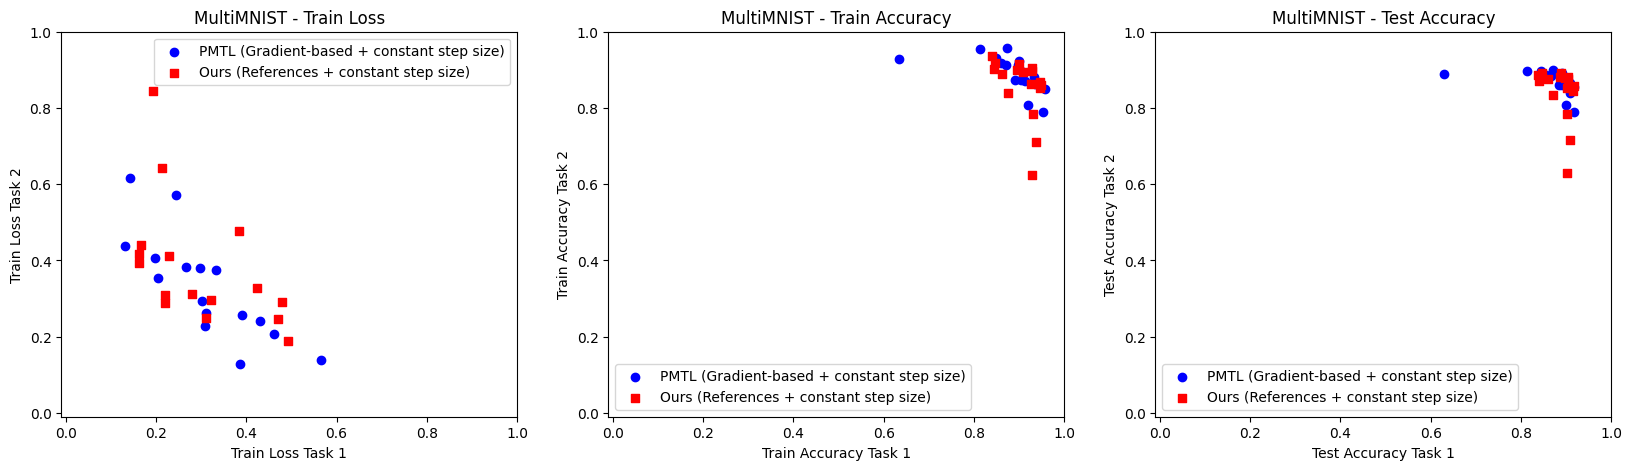

In [13]:
# Plotting train_acc[0] vs train_acc[1]
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
# train_acc[0] on x-axis and train_acc[1] on y-axis
# plt.scatter(train_losses[:, 0], train_losses[:, 1], c='r', marker='^', label='Ours (references + line-search)')
plt.scatter(train_losses_1[:, 0], train_losses_1[:, 1], c='blue', marker='o', label='PMTL (Gradient-based + constant step size)')
plt.scatter(train_losses_2[:, 0], train_losses_2[:, 1], c= 'red', marker = 's' , label='Ours (References + constant step size)')
# plt.scatter(train_losses_3[:, 0], train_losses_3[:, 1], c= 'gray', marker = '*' , label='Ours (Gradient-based + constant step size)')
plt.legend()
# Adding titles and labels
plt.title('MultiMNIST - Train Loss')
plt.xlabel('Train Loss Task 1')
plt.ylabel('Train Loss Task 2')

plt.xlim(-0.01, 1)  # Adjust x-axis range as needed
plt.ylim(-0.01, 1)  # Adjust y-axis range as needed

plt.subplot(1,3,2)
# train_acc[0] on x-axis and train_acc[1] on y-axis
# plt.scatter(train_accs[:, 0], train_accs[:, 1], c='r', marker='^', label='Ours (references + line-search)')
plt.scatter(train_accs_1[:, 0], train_accs_1[:, 1], c='blue', marker='o', label='PMTL (Gradient-based + constant step size)')
plt.scatter(train_accs_2[:, 0], train_accs_2[:, 1], c= 'red', marker = 's' , label='Ours (References + constant step size)')
# plt.scatter(train_accs_3[:, 0], train_accs_3[:, 1], c= 'gray', marker = '*' , label='Ours (Gradient-based + constant step size)')
plt.legend()
# Adding titles and labels
plt.title('MultiMNIST - Train Accuracy')
plt.xlabel('Train Accuracy Task 1')
plt.ylabel('Train Accuracy Task 2')
plt.xlim(-0.01, 1)  # Adjust x-axis range as needed
plt.ylim(-0.01, 1)  # Adjust y-axis range as needed


plt.subplot(1,3,3)
# train_acc[0] on x-axis and train_acc[1] on y-axis
# plt.scatter(test_accs[:, 0], test_accs[:, 1], c='r', marker='^', label='Ours (references + line-search)')
plt.scatter(test_accs_1[:, 0], test_accs_1[:, 1], c='blue', marker='o', label='PMTL (Gradient-based + constant step size)')
plt.scatter(test_accs_2[:, 0], test_accs_2[:, 1], c= 'red', marker = 's' , label='Ours (References + constant step size)')
# plt.scatter(test_accs_3[:, 0], test_accs_2[:, 1], c= 'gray', marker = '*' , label='Ours (Gradient-based + constant step size)')
plt.legend()
# Adding titles and labels
plt.title('MultiMNIST - Test Accuracy')
plt.xlabel('Test Accuracy Task 1')
plt.ylabel('Test Accuracy Task 2')

plt.xlim(-0.01, 1)  # Adjust x-axis range as needed
plt.ylim(-0.01, 1)  # Adjust y-axis range as needed


# Display the plot
# plt.grid(True)
plt.show()

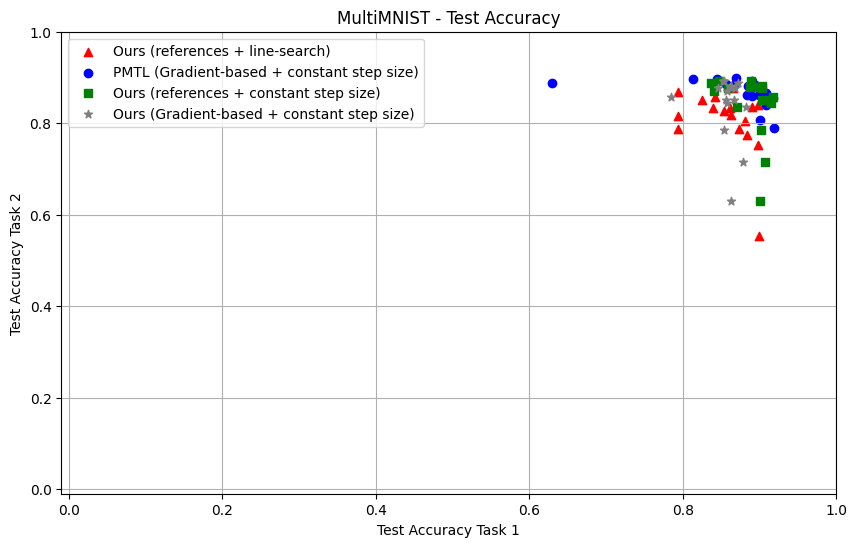

In [22]:
# Plotting train_acc[0] vs train_acc[1]
plt.figure(figsize=(10, 6))

# train_acc[0] on x-axis and train_acc[1] on y-axis
plt.scatter(test_accs[:, 0], test_accs[:, 1], c='r', marker='^', label='Ours (references + line-search)')
plt.scatter(test_accs_1[:, 0], test_accs_1[:, 1], c='blue', marker='o', label='PMTL (Gradient-based + constant step size)')
plt.scatter(test_accs_2[:, 0], test_accs_2[:, 1], c= 'green', marker = 's' , label='Ours (references + constant step size)')
plt.scatter(test_accs_3[:, 0], test_accs_2[:, 1], c= 'gray', marker = '*' , label='Ours (Gradient-based + constant step size)')
plt.legend()
# Adding titles and labels
plt.title('MultiMNIST - Test Accuracy')
plt.xlabel('Test Accuracy Task 1')
plt.ylabel('Test Accuracy Task 2')

plt.xlim(-0.01, 1)  # Adjust x-axis range as needed
plt.ylim(-0.01, 1)  # Adjust y-axis range as needed
# Display the plot
plt.grid(True)
plt.show()

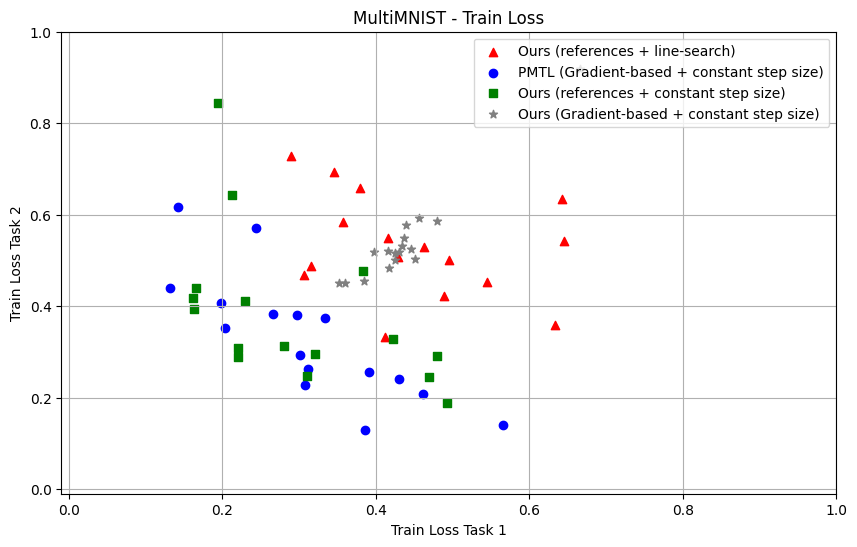

In [23]:
# Plotting train_acc[0] vs train_acc[1]
plt.figure(figsize=(10, 6))

# train_acc[0] on x-axis and train_acc[1] on y-axis
plt.scatter(train_losses[:, 0], train_losses[:, 1], c='r', marker='^', label='Ours (references + line-search)')
plt.scatter(train_losses_1[:, 0], train_losses_1[:, 1], c='blue', marker='o', label='PMTL (Gradient-based + constant step size)')
plt.scatter(train_losses_2[:, 0], train_losses_2[:, 1], c= 'green', marker = 's' , label='Ours (references + constant step size)')
plt.scatter(train_losses_3[:, 0], train_losses_3[:, 1], c= 'gray', marker = '*' , label='Ours (Gradient-based + constant step size)')
plt.legend()
# Adding titles and labels
plt.title('MultiMNIST - Train Loss')
plt.xlabel('Train Loss Task 1')
plt.ylabel('Train Loss Task 2')

plt.xlim(-0.01, 1)  # Adjust x-axis range as needed
plt.ylim(-0.01, 1)  # Adjust y-axis range as needed
# Display the plot
plt.grid(True)
plt.show()

In [8]:
# Calculate averages
avg_train_loss = np.mean(train_losses, axis=0)
avg_train_acc = np.mean(train_accs, axis=0)
avg_test_loss = np.mean(test_losses, axis=0)
avg_test_acc = np.mean(test_accs, axis=0)

# Print the averages
print(f'Average Train Loss: {avg_train_loss}')
print(f'Average Train Accuracy: {avg_train_acc}')
print(f'Average Test Loss: {avg_test_loss}')
print(f'Average Test Accuracy: {avg_test_acc}')

Average Train Loss: [0.4373945  0.57245045]
Average Train Accuracy: [0.85809657 0.80705343]
Average Test Loss: [0.43823828 0.57585593]
Average Test Accuracy: [0.85615294 0.80684412]


In [9]:
# Calculate averages
avg_train_loss_1 = np.mean(train_losses_1, axis=0)
avg_train_acc_1 = np.mean(train_accs_1, axis=0)
avg_test_loss_1 = np.mean(test_losses_1, axis=0)
avg_test_acc_1 = np.mean(test_accs_1, axis=0)

# Print the averages
print(f'Average Train Loss: {avg_train_loss_1}')
print(f'Average Train Accuracy: {avg_train_acc_1}')
print(f'Average Test Loss: {avg_test_loss_1}')
print(f'Average Test Accuracy: {avg_test_acc_1}')

Average Train Loss: [0.35648793 0.32291687]
Average Train Accuracy: [0.88283578 0.89096618]
Average Test Loss: [0.4014851  0.40479747]
Average Test Accuracy: [0.86916176 0.86746471]


In [13]:
# Calculate averages
avg_train_loss_2 = np.mean(train_losses_2, axis=0)
avg_train_acc_2 = np.mean(train_accs_2, axis=0)
avg_test_loss_2 = np.mean(test_losses_2, axis=0)
avg_test_acc_2 = np.mean(test_accs_2, axis=0)

# Print the averages
print(f'Average Train Loss: {avg_train_loss_2}')
print(f'Average Train Accuracy: {avg_train_acc_2}')
print(f'Average Test Loss: {avg_test_loss_2}')
print(f'Average Test Accuracy: {avg_test_acc_2}')

Average Train Loss: [0.29083831 0.42491794]
Average Train Accuracy: [0.90560294 0.85620637]
Average Test Loss: [0.34859547 0.47578296]
Average Test Accuracy: [0.88782647 0.84137647]


In [16]:
# Calculate averages
avg_train_loss_3 = np.mean(train_losses_3, axis=0)
avg_train_acc_3 = np.mean(train_accs_3, axis=0)
avg_test_loss_3 = np.mean(test_losses_3, axis=0)
avg_test_acc_3 = np.mean(test_accs_3, axis=0)

# Print the averages
print(f'Average Train Loss: {avg_train_loss_3}')
print(f'Average Train Accuracy: {avg_train_acc_3}')
print(f'Average Test Loss: {avg_test_loss_3}')
print(f'Average Test Accuracy: {avg_test_acc_3}')

Average Train Loss: [0.43627671 0.54103914]
Average Train Accuracy: [0.85904265 0.81847304]
Average Test Loss: [0.43505003 0.54242793]
Average Test Accuracy: [0.85777353 0.81882941]
